# Import

In [941]:
# %matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import neighbors, linear_model, datasets, model_selection, metrics
from sklearn.cluster import KMeans
from datetime import datetime
import collections
from mpl_toolkits.mplot3d import Axes3D
import csv
import pandas as pd
from sklearn.decomposition import PCA
sns.set()

# Regression

## Model functions

In [942]:
# Linear regression

def linear_reg_model(X_train, y_train, X_test, y_test):
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print("predicted: ", y_pred) 
    print("truth: ", y_test)

    # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean square error
    print("Mean Squared Error: %.2f"
          % np.mean((y_pred - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('R^2 score: %.2f' % regr.score(X_test, y_test))
#     # Plot outputs
#     for i in range(12):
#         f = plt.figure()
#         ax = f.add_subplot(111)

#         X_slice = np.zeros(X_test.shape)
#         X_slice += X_test.mean(axis=0)
#         X_slice[:, i] = X_test[:, i]

#         ax.scatter(X_test[:, i], y_test,  color='black')
#         ax.plot(X_test[:, i], regr.predict(X_slice), color='blue',
#                  linewidth=3)

#         plt.show()


In [943]:
# KNN
def KNN_model(X_train, y_train, X_test, y_test):
    knearest_reg = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform') # Keep varying k by changing n_neighbors
    knearest_reg.fit(X_train, y_train)
    y_pred = knearest_reg.predict(X_test)
    print("predicted: ", y_pred) 
    print("truth: ", y_test)

    print("Mean Squared Error: %.2f"
          % np.mean((y_pred - y_test) ** 2))
    print('R^2: %.2f' % knearest_reg.score(X_test, y_test))
    

## Hour data

### Load Data, Data Preprocessing

In [951]:
df = pd.read_csv('bike+sharing+dataset/hour.csv')
df.head() # The date variable should be converted into something else


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [952]:
datetime.strptime(df['dteday'][0], '%Y-%m-%d').date().toordinal()

dteday_column = df['dteday']

# The function for changing the dteday string value to date, than to ordinal number
def dateToOrdinal(date):
    return datetime.strptime(date, '%Y-%m-%d').date().toordinal()

# Apply a Function to Each Value
new_dteday_column = dteday_column.apply(dateToOrdinal)

#  Assign the New Values Back to the Column
df['dteday'] = new_dteday_column
# Instant number is not relevant to the prediction

df = df.drop(columns=['instant'])
df


# Although the date was transfered into numbers, the date will be dropped when applying to 
# the model, since I found out the model training without the date data 
# generally have a better result


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,734868,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,734868,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,734868,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,734868,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### i. Predict the hourly values for the number of casual riders

In [957]:
# Remove registered riders and total ridership
# casual_df = df.drop(columns=['registered', 'cnt', 'dteday', 'holiday', 'temp', 'weekday'])
casual_df = df.drop(columns=['registered', 'cnt', 'dteday', 'holiday', 'weekday'])

### select all rows except casual
X_matrix = casual_df.drop(['casual'], axis=1)
Y = df['casual']

X_matrix = X_matrix.values
Y = Y.values

X_matrix

array([[ 1.    ,  0.    ,  1.    , ...,  0.2879,  0.81  ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.2727,  0.8   ,  0.    ],
       [ 1.    ,  0.    ,  1.    , ...,  0.2727,  0.8   ,  0.    ],
       ...,
       [ 1.    ,  1.    , 12.    , ...,  0.2576,  0.6   ,  0.1642],
       [ 1.    ,  1.    , 12.    , ...,  0.2727,  0.56  ,  0.1343],
       [ 1.    ,  1.    , 12.    , ...,  0.2727,  0.65  ,  0.1343]])

In [958]:
# 80/20 split for train/test
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_matrix, Y, test_size=1/5.)

In [959]:
linear_reg_model(X_train, y_train, X_test, y_test)

predicted:  [-13.11004317  -2.90529574  41.03454574 ...  14.85369844 -36.56485325
  50.78495501]
truth:  [ 3  4 70 ...  7  1 56]
Coefficients: [  2.09069187  10.42592526  -0.13727103   1.19310925 -34.51991258
   2.48193156  53.82332036  60.65304647 -70.00233575   3.52584566]
Mean Squared Error: 1288.56
R^2 score: 0.47


In [960]:
KNN_model(X_train, y_train, X_test, y_test)

predicted:  [13.8  4.8 57.2 ...  7.8  0.8 54.2]
truth:  [ 3  4 70 ...  7  1 56]
Mean Squared Error: 429.77
R^2: 0.82


### ii. Predict the hourly values for the number of registered riders

In [961]:
# Remove casual riders and total ridership
# registered_df = df.drop(columns=['casual', 'cnt', 'dteday', 'holiday', 'temp', 'weekday'])
registered_df = df.drop(columns=['casual', 'cnt', 'dteday', 'holiday', 'weekday'])

### select all rows except registered
X_matrix = registered_df.drop(['registered'], axis=1)
Y = df['registered']

X_matrix = X_matrix.values
Y = Y.values


In [962]:
# 80/20 split for train/test
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_matrix, Y, test_size=1/5.)

In [963]:
linear_reg_model(X_train, y_train, X_test, y_test)

predicted:  [149.02858729 288.91835664 138.01552763 ...   2.44398631 228.46020896
  62.42375256]
truth:  [  9 169 249 ...  31 373  70]
Coefficients: [ 1.84813412e+01  7.02502622e+01 -1.33135010e-01  6.45876819e+00
  4.01441735e+01 -4.73745241e+00  2.82794378e+01  1.72521419e+02
 -1.31330632e+02  3.57551952e+01]
Mean Squared Error: 15665.86
R^2 score: 0.32


In [965]:
KNN_model(X_train, y_train, X_test, y_test)

predicted:  [ 23.  201.6 360.8 ...  17.6 307.   77. ]
truth:  [  9 169 249 ...  31 373  70]
Mean Squared Error: 2020.82
R^2: 0.91


### iii. Predict the hourly values for the number of total ridership count

In [966]:
# Remove casual riders and registered ridership
cnt_df = df.drop(columns=['casual', 'registered', 'dteday', 'holiday', 'weekday'])

### select all rows except total
X_matrix = cnt_df.drop(['cnt'], axis=1)
Y = df['cnt']

X_matrix = X_matrix.values
Y = Y.values

In [967]:
# 80/20 split for train/test
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_matrix, Y, test_size=1/5.)

In [968]:
linear_reg_model(X_train, y_train, X_test, y_test)

predicted:  [206.68842702 104.11680705 113.52029644 ...   7.26895148 115.22746916
 185.35236871]
truth:  [152  16  74 ...  29  60 112]
Coefficients: [  20.31689561   80.99994971   -0.25637119    7.65338196    6.60262806
   -2.74823789  110.01102349  200.83062604 -204.37904639   37.85947394]
Mean Squared Error: 20046.94
R^2 score: 0.38


In [969]:
KNN_model(X_train, y_train, X_test, y_test)

predicted:  [140.2  30.4  65.  ...  21.8 182.   47.8]
truth:  [152  16  74 ...  29  60 112]
Mean Squared Error: 2954.39
R^2: 0.91


## Day Data 

In [972]:
df_day = pd.read_csv('bike+sharing+dataset/day.csv')
df_day.head() # The date variable should be converted into something else

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [973]:
dteday_column = df_day['dteday']

# The function for changing the dteday string value to date, than to ordinal number
def dateToOrdinal(date):
    return datetime.strptime(date, '%Y-%m-%d').date().toordinal()

# Apply a Function to Each Value
new_dteday_column = dteday_column.apply(dateToOrdinal)

#  Assign the New Values Back to the Column
df_day['dteday'] = new_dteday_column
# Instant number is not relevant to the prediction
df_day = df_day.drop(columns=['instant']) 
df_day


# Although the date was transfered into numbers, the date will be dropped when applying to 
# the model, since I found out the model training without the date data 
# generally have a better result


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,734138,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,734139,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,734140,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,734141,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,734142,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,734864,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,734865,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,734866,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,734867,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


###  i. Predict the daily values for the number of casual riders

In [994]:
# Remove registered riders and total ridership
casual_df_day = df_day.drop(columns=['registered', 'cnt', 'dteday', 'holiday', 'weekday'])

### select all rows except casual
X_matrix = casual_df_day.drop(['casual'], axis=1)
Y = df_day['casual']

# # Select the values as numpy
# X_matrix = X_matrix.to_numpy

X_matrix = X_matrix.values
Y = Y.values

In [995]:
# 80/20 split for train/test
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_matrix, Y, test_size=1/5.)

In [996]:
linear_reg_model(X_train, y_train, X_test, y_test)

predicted:  [ 894.94195755 1275.5953212  1004.95878217  249.11726896  -66.4411196
  164.77661971  946.52168052  888.30308824  908.44381638  521.85398004
 1383.1428525  1087.944513   -215.51547543 1180.19496952  801.58406348
  130.70972204  874.02432553  825.25999333  726.505464   1202.24180376
  803.60910266  737.08324516   23.77906668  -39.34995786 1530.40691962
  280.08300422  523.40367379 1689.29775852  157.36686388  861.54620428
 1908.30169716 1499.2173284   619.97609926 1858.42229893 1900.04404659
 2068.7542234   -64.95897656  -19.28534973  919.95742368  830.42357521
  188.91460118  369.85764235  469.96334069  802.19977892 1726.78429572
 1117.15075038  804.20548084 1121.99474128  254.6827412  1773.9753568
 1338.46466002 1083.29901277 1246.10290686  222.83554313 1288.07614908
  660.48146354  193.05470027 -187.79461957 1242.41132344 1517.99050764
 1752.60931095 -217.70867244  946.14623786  359.69717998 1107.87467879
  408.60439015 -129.00037782 1642.34701927  171.63322859  903.70361

In [989]:
KNN_model(X_train, y_train, X_test, y_test)

predicted:  [ 287.2  128.2  401.8  664.6  724.2 2149.4  902.8 1044.2  652.2  494.
 1754.4  649.2  252.   354.2 1012.6 1269.6  129.6   84.6 1688.8  618.4
  432.   862.8  805.6 1617.8  220.8  434.2  747.2 1182.6  434.2  701.6
  253.2  495.8 1800.6 1055.4  837.2  357.2  685.   677.    94.8 1127.8
  996.6  721.2  923.8  746.8  986.   208.8  894.6  748.8   84.6  925.6
  434.2  623.4   75.2  224.2 1167.   838.4  862.8 1044.2 1044.2   84.6
 2063.4  882.6 1488.   174.8  475.   101.2  401.8  196.   401.8  659.
  291.6 1198.2  664.6  347.2 1679.   665.  1625.2  852.8 1073.2  998.
 2149.4  250.6  592.   664.6  604.   293.6  846.8  413.4  794.6  167.8
  350.2 1286.2 1044.2 1245.2  820.6  772.6  267.6  467.   133.   316.8
  420.4  261.4  794.6 1375.8  136.4 1550.6  280.2 1023.2  665.   467.
  809.2  645.8 1153.2   84.6  882.   664.6 1008.4  102.2  363.4 1316.
  427.6 1482.   917.2 2619.6 1552.6  455.2  753.   724.2  333.6 1754.4
 1488.    82.2  998.4 1108.8   79.6  476.2 1297.2  236.8 1123.8  169.2

###  ii. Predict the daily values for the number of registered riders

In [990]:
# Remove casual riders and total ridership
registered_df_day = df_day.drop(columns=['casual', 'cnt',  'dteday', 'holiday', 'weekday'])

### select all rows except registered
X_matrix = registered_df_day.drop(['registered'], axis=1)
Y = df_day['registered']

X_matrix = X_matrix.values
Y = Y.values

In [991]:
# 80/20 split for train/test
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_matrix, Y, test_size=1/5.)

In [992]:
linear_reg_model(X_train, y_train, X_test, y_test)

predicted:  [3318.42347567 2242.38995079 2566.07632575 2734.81039698 2469.15473323
 5124.92799468 4469.47677823 1541.64970888 2370.06601915 2044.40640601
 1529.4259067  5414.42768674 4812.79693085 3538.03610197 2867.93138917
 3003.36030401 2530.51975596 1788.55054599 3622.54626125  517.28388687
 2290.94363656 5594.11023241 2373.17971595 5536.21749197 4380.66845517
 3038.04816871 4591.29246804 3006.65092705 2749.3473523  3289.28933134
 3308.63953561 4488.33146982 2308.17981127 1836.0651082  1528.64898918
 5557.7096694  4607.61286379 3055.66893119 4814.4970207  4536.13735761
 4130.12764795  157.66540413 5333.96378705 4199.05578743 3428.47289157
 1417.0196149  5135.15934715 2849.70514199 4939.98622933 3255.49852992
 1961.67319041 3226.65375467 2618.34599634 2033.09817239 1165.66558979
 4376.71613099 3624.31499957 5896.02725576 3761.14758736 3626.75254124
 2084.96359989 2715.34400018 2372.87078358 3486.06958303 2710.15314794
 1591.30033408 6124.67208676 3385.35689213 4016.59299682 4235.648

In [993]:
KNN_model(X_train, y_train, X_test, y_test)

predicted:  [3171.6 2213.8 2971.2 2295.6 2881.8 4630.2 5057.  1256.2 2533.6 1758.
 1256.2 6793.  5732.  4467.4 3883.2 3520.8 2660.6 1560.8 4042.4  897.6
 2536.  6548.2 3214.8 6548.2 3702.4 3109.2 5320.6 3758.6 1920.6 3378.2
 3784.4 4418.  2772.8 1632.6 1570.  5706.6 4959.6 2821.2 5044.6 4114.4
 3964.8 1533.4 5871.4 4617.4 2960.4 1256.2 5424.  3097.6 4412.4 2935.
 1352.4 3153.2 3394.4 1601.4 1531.2 2822.4 3192.2 5972.  3773.2 3544.2
 2148.  3738.4 1765.6 3544.2 2648.  1339.6 5781.4 3192.2 3693.8 3999.6
 4338.4 2213.8 3659.6 3555.2 5706.6 4123.6 3112.6 1852.  4120.2 3906.6
 4689.4 3703.6 3683.6 3873.4 4133.8 4714.4 5781.4 3015.8 3726.8 3659.6
 3869.  3237.6 5088.8 6229.2 5898.6 3794.  4550.4 3190.6 5071.8 6793.
 3940.4 3724.2 1672.8 4003.  3561.6 5183.4 1837.6 5285.8 3137.  2619.8
 4288.8 2648.  3494.2 3849.4 6202.  5117.  2295.6 3999.6 3756.4 4582.8
 6631.8 3192.2 3922.4  810.2 1920.6 5724.2 2603.8 6022.4 3906.6 5887.2
 4531.4 3237.6 4151.6 1672.  2603.8 1712.  3612.2 4382.4 4911.8 3628

###  iii. Predict the daily values for total ridership count

In [997]:
# Remove casual riders and registered ridership
cnt_df_day = df_day.drop(columns=['casual', 'registered', 'dteday', 'holiday', 'weekday'])

### select all rows except total
X_matrix = cnt_df_day.drop(['cnt'], axis=1)
Y = df_day['cnt']
X_matrix
X_matrix = X_matrix.values
Y = Y.values

In [998]:
# 80/20 split for train/test
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_matrix, Y, test_size=1/5.)

In [999]:
linear_reg_model(X_train, y_train, X_test, y_test)

predicted:  [5964.11216015 4973.13813599 7000.14472525 6666.91740884 5444.14825035
 1652.50965875 1184.46635487 1881.58654677 5852.30543879 2123.38297058
 5490.43152112 4125.16109118 4092.23306339 2787.0520313  6718.12136282
 6833.75609043 2828.21706266 1329.86007249 3821.36056136 4075.54765073
 4226.40027029 7066.28346568 6312.44390818 5974.07075832 6381.00671359
 3061.60830179 7312.67673711 1370.11245742 6098.04777976 6849.55120192
 3569.47557512 5445.386714   4372.08388613 3350.23601303 1103.25300536
 6279.2609568  6093.75025347 4012.86519338 3747.12144634 6017.82628736
 3754.84806932 5182.72529486  618.47540994 7268.76438808 2690.9462183
 4284.70376535 5513.90353557 4690.86799548 3194.47127633 4418.3450144
 7680.61502654 5233.85459907 3796.88306919 3610.69030234 3002.63641862
 2843.87617707 1813.96310399 4371.27390694 2194.72416259 7374.50657141
 4873.10185516 6417.84724182 6443.04380791 5957.38153468 4014.44067419
 2072.78443746 5821.3917762  4155.37315991 7167.3386909  6977.56445

In [1000]:
KNN_model(X_train, y_train, X_test, y_test)

predicted:  [5725.4 5439.2 7620.4 6755.4 4489.4 1432.8 1381.  2330.4 4455.8 1848.8
 5500.6 2901.8 5132.  2231.4 6169.8 7105.  2394.8 1957.  3583.4 3469.4
 3695.6 7347.4 5473.  4265.  7221.6 3121.2 5815.6 1656.6 5187.4 7830.4
 3499.6 5236.6 4512.8 4663.2 1128.6 6002.  5149.  4663.2 3536.2 7221.6
 3793.  5238.8 1107.  7221.6 2228.4 3872.6 6487.  4604.4 2850.6 4720.
 5859.8 5337.  1168.8 4198.4 1974.2 2394.8  979.8 4589.8 1990.  7118.4
 5465.6 7653.6 6480.4 5168.6 4007.  1730.  6149.6 4512.6 6811.6 7626.4
 6760.6 1513.2 5250.  4834.  2780.8 5168.6 2409.6 4638.  5949.4 4388.8
 5005.8 6916.2 1150.8 6958.4 7830.4 3854.2 3858.6 3125.4 5974.  2349.2
 2647.4 4910.4 7437.8 7451.6 5338.  1814.  5265.2 5611.2 3358.6 6654.4
 3006.2 6196.4 3323.2 1990.  5381.  5696.  7221.6 7200.6 6169.8 4530.4
 5168.6 7669.6 1974.2 4530.4 6019.2 3716.8 2903.2 4599.4 4730.  1698.
 4638.  3716.8 1917.6 3623.8 5168.6 3092.2 7398.  4970.  4102.4 2903.2
 1463.2 3002.4 7741.4 2037.4 7511.8 2547.6 3361.8 4670.8 5551.6 447

# Clustering

## Load Data, Data Preprocessing

In [771]:
with open("seeds_dataset.txt", "rt") as fin: 
    for line in fin:                
        print(line.strip())

15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
13.84	13.94	0.8955	5.324	3.379	2.259	4.805	1
16.14	14.99	0.9034	5.658	3.562	1.355	5.175	1
14.38	14.21	0.8951	5.386	3.312	2.462	4.956	1
14.69	14.49	0.8799	5.563	3.259	3.586	5.219	1
14.11	14.1	0.8911	5.42	3.302	2.7		5		1
16.63	15.46	0.8747	6.053	3.465	2.04	5.877	1
16.44	15.25	0.888	5.884	3.505	1.969	5.533	1
15.26	14.85	0.8696	5.714	3.242	4.543	5.314	1
14.03	14.16	0.8796	5.438	3.201	1.717	5.001	1
13.89	14.02	0.888	5.439	3.199	3.986	4.738	1
13.78	14.06	0.8759	5.479	3.156	3.136	4.872	1
13.74	14.05	0.8744	5.482	3.114	2.932	4.825	1
14.59	14.28	0.8993	5.351	3.333	4.185	4.781	1
13.99	13.83	0.9183	5.119	3.383	5.234	4.781	1
15.69	14.75	0.9058	5.527	3.514	1.599	5.046	1
14.7	14.21	0.9153	5.205	3.466	1.767	4.649	1
12.72	13.57	0.8686	5.226	3.049	4.102	4.914	1
14.16	14.4	0.8584	5.658	3.129	3.072	5.176	1
14.11	14.26	0.8722	5.52	3.168	2.688	5.219	1
15.88	14.9	0.8988	5.618	3

In [772]:
col_names = ["area", "perimeter", "compactness", "length", 
"width", "asymmetry-coefficient", "length-of-kernel-groove", "class"]

my_data = []

with open("seeds_dataset.txt", "rt") as fin: 
    for line in fin:               
        line = line.replace("\n", "") 
#         Replacing all "\t" to ","
        line = line.replace("\t", ",")
#     The data is not format very well, sometimes it has two "\t" 
#     Transform all spaces into "," than remove the repeated ","
        line = line.replace(",,", ",")
#     Split the rows by "," 
        attributes = line.split(",")
        attributes = [float(x) for x in attributes]
        my_data.append(attributes)

my_data = np.array(my_data)
print(my_data)
print("Shape", my_data.shape) 

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]
Shape (210, 8)


In [773]:
df = pd.DataFrame(data=my_data, columns=col_names)
df # Now the pandas dataframe looks good to go

,area,perimeter,compactness,length,width,asymmetry-coefficient,length-of-kernel-groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3.0
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3.0
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3.0
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3.0


In [774]:
y = df['class']
X = df.drop(['class'], axis=1)
X

,area,perimeter,compactness,length,width,asymmetry-coefficient,length-of-kernel-groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [775]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
205    3.0
206    3.0
207    3.0
208    3.0
209    3.0
Name: class, Length: 210, dtype: float64

## KMeans

In [776]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]] #centers for the clusters
kmeans_cluster_algo = KMeans(n_clusters=3)

In [777]:
kmeans_cluster_algo.fit(X)

/Users/juichilee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [778]:
print(kmeans_cluster_algo.labels_[::10])
y = y.values
print(y[::10]-1)
# The class results look good, three groups seem reasonable

[0 0 0 0 0 0 2 1 1 1 0 1 1 1 2 2 2 2 2 2 2]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2.]


In [779]:
print("Cluster (result of k-means)")

results = collections.Counter(kmeans_cluster_algo.labels_)
# Default label values in scikit learn start from 0, whereas the dataset
# here starts labels with 1
print(results)
print("Ground truth")
print(collections.Counter(y))

Cluster (result of k-means)
Counter({2: 77, 0: 72, 1: 61})
Ground truth
Counter({1.0: 70, 2.0: 70, 3.0: 70})


## PCA

In [780]:
# X = X.values
# X
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


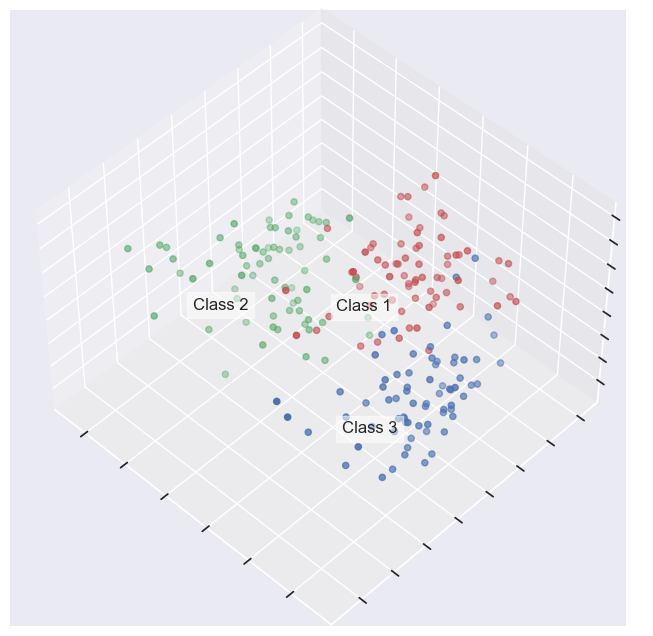

In [781]:
#PCA demonstrated and plotting example 

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d', elev=48, azim=134)
### PCA part of the code
#============================================================
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

#============================================================
y = y - 1  # Adjust labels to start from 0
print(y)
y = y.astype(int)
# Color mapping
colors = ['r', 'g', 'b']
color_map = [colors[label] for label in y]

# Plotting
for name, label in [('Class 1', 0), ('Class 2', 1), ('Class 3', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
              
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color_map)
# Hide axis tick labels
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()


# ##Plot to demonstrate PCA transformation (using a box plot to demonstrate the transoformation) - not needed for 
# for name, label in [('Class 1', 0), ('Class 2', 1), ('Class 3', 2)]: #Assign actual names to the numeric labels
#     ax.text3D(X[y == label, 0].mean(),
#               X[y == label, 1].mean() + 1.5,
#               X[y == label, 2].mean(), name,
#               horizontalalignment='center',
#               bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


# # Reorder the labels to have colors matching the cluster results
# # y = np.choose(y, [1, 2, 0]).astype(float)
# y = np.choose(y, [1, 2, 0]).astype(float)

# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y) # plotting the three clusters and the indicating the sequence parameter 'c'

# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])

# plt.show()